# Checkerboard test

The goal of this notebook is to check if the selective tones tool is apply on each pixel or on a patch of a given size, to see it we will study the impact of selective tones on checkerboards of different sizes

In [2]:
import numpy as np
import matplotlib.pyplot as plt

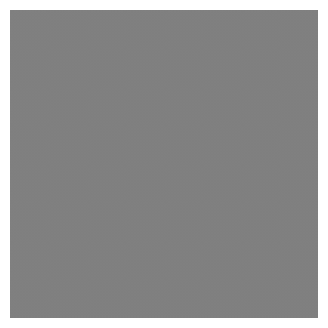

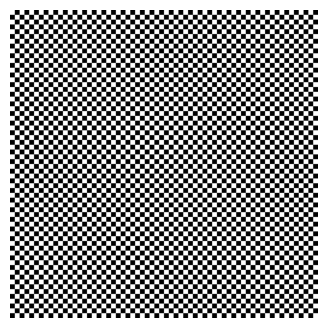

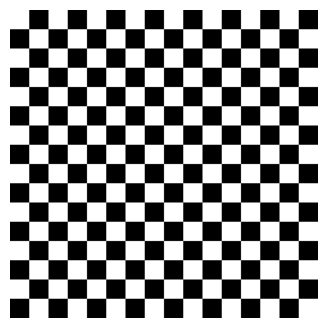

In [76]:
def create_checkerboard_image(size: int, square_size: int)->np.ndarray:
    """create an image of size size, containing black and white squares of size square_size

    Args:
        size (int): size of the image
        square_size (int): size of the squares

    Returns:
        numpy.ndarray: image
    """
    image = np.zeros((size, size), dtype=np.uint8)
    assert size % square_size == 0
    for i in range(0, size, square_size * 2):
        for j in range(0, size, square_size * 2):
            image[i:i+square_size, j:j+square_size] = 255  # white square
            image[i+square_size:i+square_size*2, j+square_size:j+square_size*2] = 255  # white square
    return image

sizes = [1, 16, 64]
for size in sizes:
    image = create_checkerboard_image(1024, size)
    plt.figure(figsize=(4, 4))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()
    plt.imsave(f"checkerboard_{size}.tif", image, cmap='gray', format='tiff')
    

From these images, we apply selective tones the 3 images with value -50 and 50 on black, shadow, middle and high tones

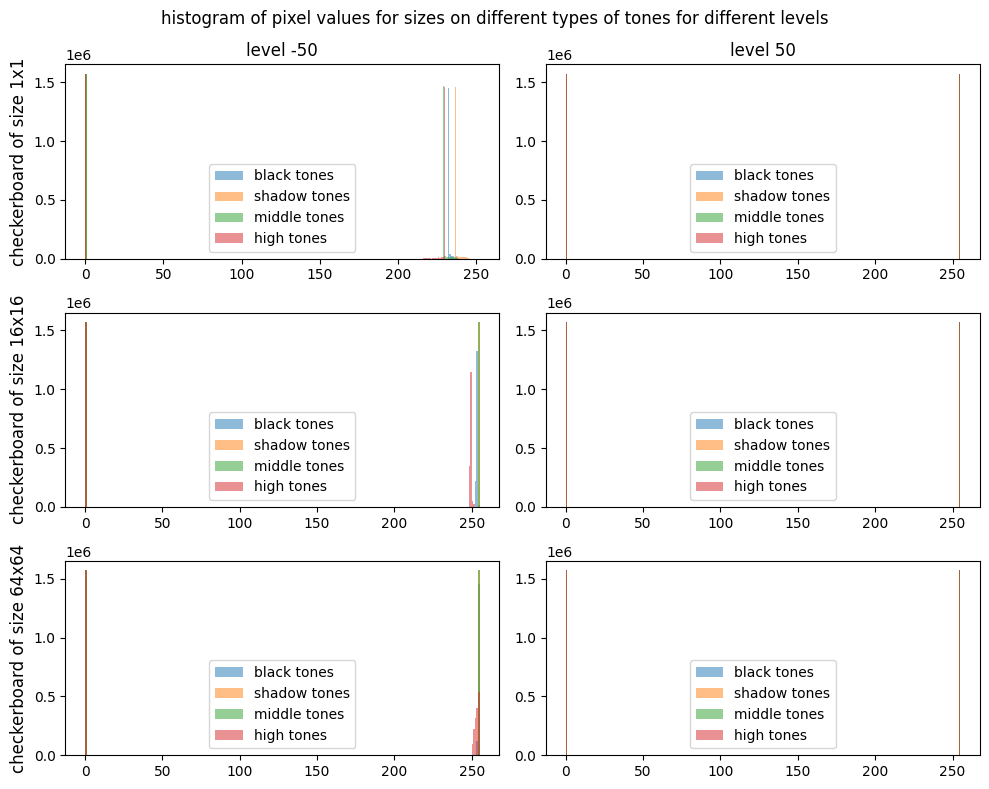

In [82]:
# print histogram of values in the image
types = ["black", "shadow", "middle", "high"]
levels = [-50, 50]
sizes = [1, 16, 64]

# Configuration du tableau de plots
rows, cols = len(sizes), len(levels)
fig, axs = plt.subplots(rows, cols, figsize=(10, 8))
fig.suptitle("histogram of pixel values for sizes on different types of tones for different levels")

# Ajout de titres pour les colonnes
for ax, level in zip(axs[0], levels):
    ax.set_title('level '+str(level))

# Ajout de titres pour les lignes avec une inclinaison de 90 degrés
for ax, type in zip(axs[:,0], sizes):
    ax.set_ylabel(f"checkerboard of size {str(type)}x{str(type)}", rotation=90, size='large')

# plot each histogram on the same plot
for s_idx, size in enumerate(sizes):
    for l_idx, level in enumerate(levels):
        for t_idx, type in enumerate(types):
            image_name = f"checkerboard_{size}_{type}_{level}.tif"
            image = plt.imread(image_name)
            axs[s_idx, l_idx].hist(image.flatten(), bins=256, alpha=0.5, label=f"{type} tones")
            axs[s_idx, l_idx].set_xlabel("pixel value")
        axs[s_idx, l_idx].legend()
plt.tight_layout()
plt.show()
fig.savefig("checkerboard_histograms.png", dpi=300)

As can be seen, the luminance distribution always corresponds to two peaks, so no patch seems to be applied. However, when the parameters are less than 0, the peaks are of a certain width, which leads us to hypothesise that our observation may not be rigorously correct when the parameters are less than 0. However, the width of the peaks seems negligible, so we can estimate that the system is operating pixel by pixel and not by patch.